In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def ref_sine( f, phase=0, amplitud=1.0 ,number_of_points=1000): #Creates a sine wave
  signal=[np.sin((( 2*np.pi *f )*(n/number_of_points))+phase) for n in range(number_of_points)]
  return amplitud*np.array(signal)

def uniform_noise(signal): # Aplies uniform noise between [-1,1] to the signal
  noise=2*np.random.rand(len(signal)) - 1
  return signal+noise
def gaussian_noise(signal): # Aplies gaussian noise centered in 0 with 1 std
  noise=np.random.normal(size=len(signal),scale=3.5)
  return signal+noise

#signal=ref_sine(10)
#noisy_signal=gaussian_noise(signal)
#plt.plot(noisy_signal)
#plt.plot(signal)
#mezcla=np.multiply(noisy_signal,signal)
#plt.plot(mezcla)

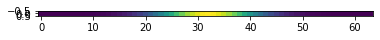

In [ ]:
#Simulacion:
size=64
#################################

#Inicializamos las amplitudes de las ondas sinusoidales (como una gaussiana)

amplitude_init=np.ones((size,size))
for i in range(size):
  for j in range(size):
    amplitude_init[i,j]=10*np.exp(-((i-size/2)**2)/100-((j-size/2)**2)/100)
#plt.imshow(amplitude_init)
#plt.show()

##################################

# inicializamos la matriz de las señales de referencia y la llenamos con funciones Sin con amplitudes y frecuencias predefinidas.

matrix=np.zeros((size,size,1000))

for i in range(size):
  for j in range(size):
    matrix[i,j,:]=ref_sine(f=i+1,amplitud=amplitude_init[i,j])

##################################

#Creamos una matriz ruidosa a partir de la matriz de señales de referencia

noisy_matrix=np.zeros((size,size,1000))

for i in range(size):
  for j in range(size):
    noisy_matrix[i,j,:]=gaussian_noise(matrix[i,j,:])

##################################

#colapsamos la matrix a dos dimensiones

noisy_collapsed_matrix=np.sum(noisy_matrix,axis=0,keepdims=1)
noisy_collapsed_matrix.shape

collapsed_amplitude=np.sum(amplitude_init,axis=0,keepdims=1)
collapsed_amplitude.shape

plt.imshow(collapsed_amplitude)
plt.show()

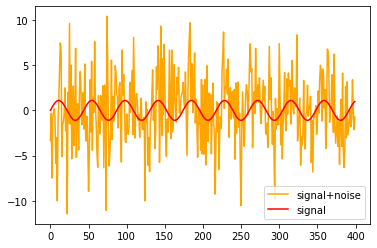

In [ ]:
plt.figure()
plt.plot(gaussian_noise(matrix[22,21,:400]),color="orange",label="signal+noise")
plt.plot(matrix[22,21,:400],color="red",label="signal")
plt.legend()


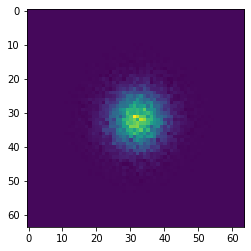

In [ ]:
filtered_image=np.mean(np.multiply(matrix,noisy_collapsed_matrix),axis=2)
plt.imshow(2*filtered_image)
plt.show()



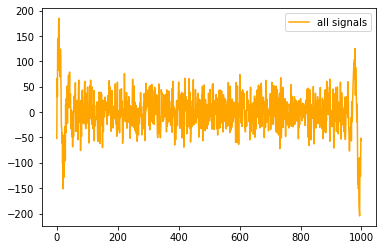

In [ ]:
plt.plot(noisy_collapsed_matrix[0,30,:],label="all signals",color="orange")
plt.legend()

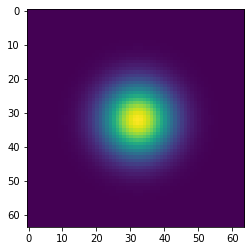

In [ ]:
plt.imshow(amplitude_init)
plt.show()

In [191]:
def real_sine(f, phase=0, amplitud=1.0 ,number_of_points=10000,t_f=1): #Creates a sine wave
  signal=[]
  for i in range(number_of_points):
    t=i*t_f/number_of_points
    señal=amplitud*np.sin((2*np.pi *f *t)+phase)
    signal.append(señal)
  return np.array(signal)

def stepped_sine(f, phase=0, amplitud=1.0 ,number_of_points=10000,t_f=1, dt=0.1): #PILAS CON EL dt=sensibilidad de la camara
  signal=[]
  contador=0
  for i in range(number_of_points):
    t=i*t_f/number_of_points
    if t>=contador*dt:
      contador+=1
    t_new=contador*dt
    señal=(amplitud*np.sin((2*np.pi *f *t_new)+phase)+amplitud)/2
    signal.append(np.around(señal))
  for item in signal:
    if item<0:
      item=0
  return signal


def noisy_sine(f, phase=0, amplitud=1.0 ,number_of_points=10000,t_f=1, dt=0.1): #pilas con el dt=sensibilidad de la camara
  signal=[]
  contador=0
  for i in range(number_of_points):
    t=i*t_f/number_of_points
    if t>=contador*dt:
      contador+=1
      random=(2*np.random.rand()-1)
    t_new=contador*dt
    señal=(amplitud*np.sin( (2*np.pi *f *t_new) +phase )+amplitud)/2
    ruido=np.sqrt(np.abs(señal))*random
    signal.append(np.around(señal+ruido))
  for item in signal:
    if item<0:
      item=0
  return signal


49.53106132934692


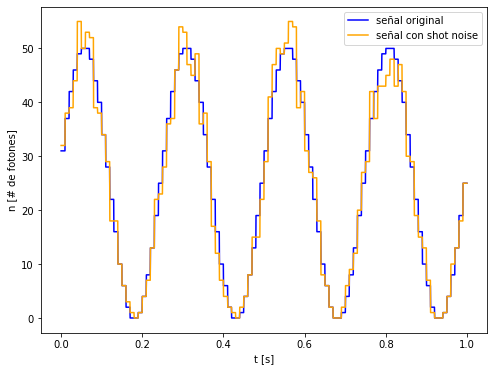

In [282]:

points=2000
t_f=1
frecuencia=4
dt=0.01
amplitud=50


ref_signal=real_sine(frecuencia,number_of_points=points,amplitud=1)
in_signal=stepped_sine(frecuencia,number_of_points=points,dt=dt,amplitud=amplitud)
noisy_signal=noisy_sine(frecuencia,number_of_points=points,dt=dt,amplitud=amplitud)

### LOCK-IN devuelve la amplitud de la señal con ruido siempre y cuando la señal de ref tenga amplitud 1
print(4*np.mean(np.multiply(ref_signal,noisy_signal)))



### Ploteamos!
plt.figure(figsize=(8,6))
###
#plt.plot(np.linspace(0,t_f,points),ref_signal,color="blue")
###
plt.plot(np.linspace(0,t_f,points),in_signal,color="blue",label="señal original")
###
plt.plot(np.linspace(0,t_f,points),noisy_signal,color="orange",label="señal con shot noise")

plt.legend()
plt.ylabel("n [# de fotones]")
plt.xlabel("t [s]")
plt.show()



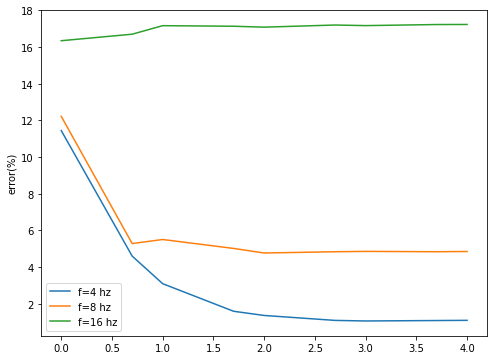

In [270]:
def simulacion(amplitud,frecuencia=4,points=200,t_f=1,dt=0.01,intentos=200):
  error_ponderado=[]
  for i in range(intentos):
    ref_signal=real_sine(frecuencia,number_of_points=points,amplitud=1)
    #in_signal=stepped_sine(frecuencia,number_of_points=points,dt=dt,amplitud=amplitud)
    noisy_signal=noisy_sine(frecuencia,number_of_points=points,dt=dt,amplitud=amplitud)
    amplitud_lockin=4*np.mean(np.multiply(ref_signal,noisy_signal))
    error_ponderado.append(np.abs(amplitud-amplitud_lockin)/amplitud)
  error_ponderado=np.array(error_ponderado)*100
  return(np.mean(error_ponderado))

plt.figure(figsize=(8,6))
for f in [4,8,16]:
  x=np.array([1,5,10,50,100,500,1000,5000,10000])
  y=np.array([simulacion(item,frecuencia=f,points=int(500*f/4)) for item in x])
  plt.plot(np.log10(x),y,label="f="+str(f)+" hz")
plt.legend()
plt.ylabel("error(%)")
plt.show()

In [257]:
1e-6

1e-08

In [258]:
1e-3

0.001